## Data Preprocessing
## Train the model
## Evaluate the model
## Plot graphs

###

### 1) Load the Data

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import re

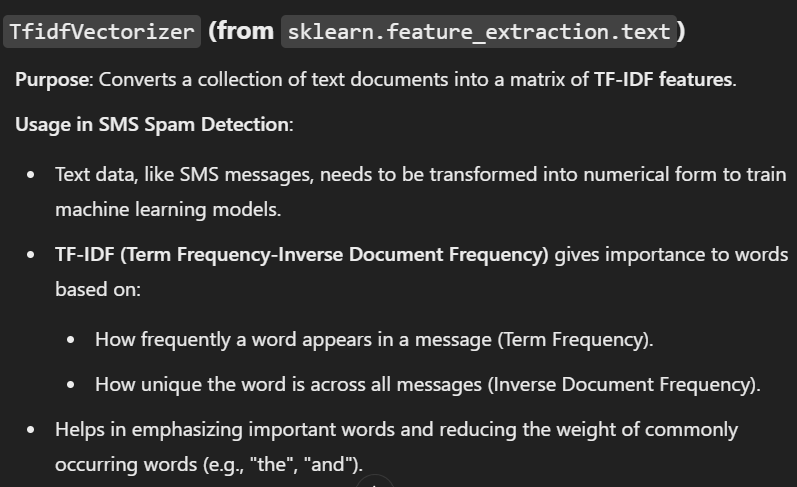 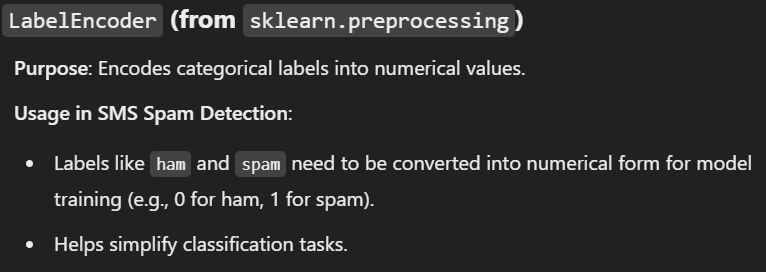 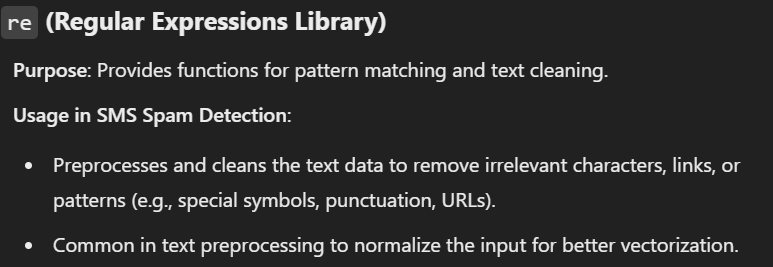

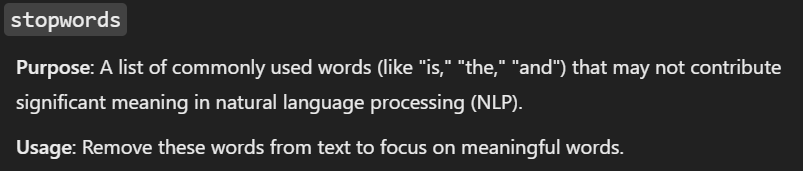

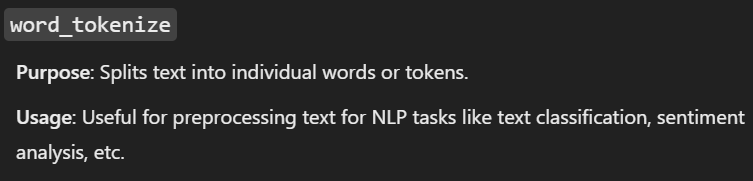

In [ ]:
data = pd.read_csv('spam.csv', encoding='latin1')

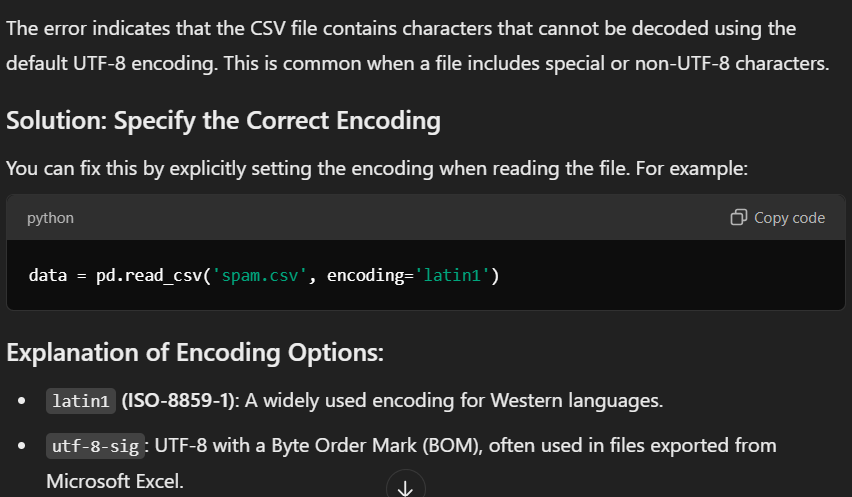

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data = data[['v1','v2']]

In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.columns=['label','message']

In [ ]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


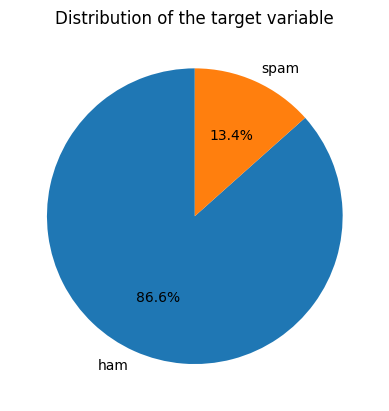

In [ ]:
### Visualize Our Dataset
plt.pie(data['label'].value_counts(),labels=['ham','spam'], autopct='%1.1f%%',startangle=90)
plt.title('Distribution of the target variable')
plt.show()

# Imbalanced dataset

In [ ]:
from wordcloud import WordCloud

spam_words = ' '.join(data[data['label']==1]['message'])
ham_words = ' '.join(data[data['label']==0]['message'])

spam_wc = WordCloud(width=800,height=600,background_color='black').generate(spam_words)
ham_wc = WordCloud(width=800,height=600,background_color='white').generate(ham_words)

plt.figure(figsize=(20,10))

plt.subplot(1,2,2)
plt.title('Spam Messages')
plt.imshow(spam_wc,interpolation='bilinear')
plt.axis('off')

plt.subplot(1,2,1)
plt.title('Ham Mesasges')
plt.imshow(ham_wc,interpolation='bilinear')
plt.axis('off')

plt.show()

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words[:10])  # Print the first 10 stop words to verify


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

## Need to verify punkt_tab 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\DELL/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 2) Data Cleaning
Convert to Lowercase:
Text preprocessing starts with converting all characters to lowercase to ensure consistency.

Remove Punctuation and Special Characters:
Strip unwanted characters using regex.

Remove Stopwords:
Eliminate common but non-informative words like "the," "is."

Tokenize Text:
Split text into words for further processing.

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'\W+', ' ', text)
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Apply preprocessing
data['cleaned_message'] = data['message'].apply(preprocess_text)


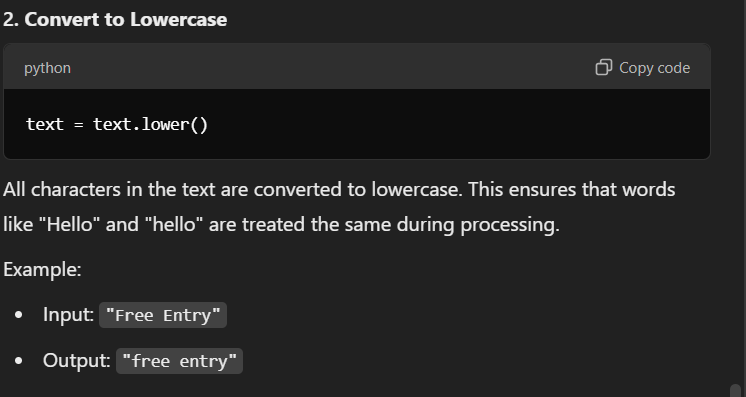 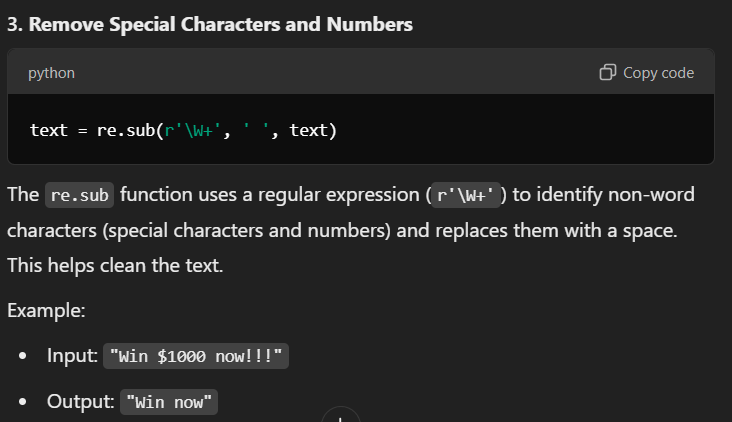 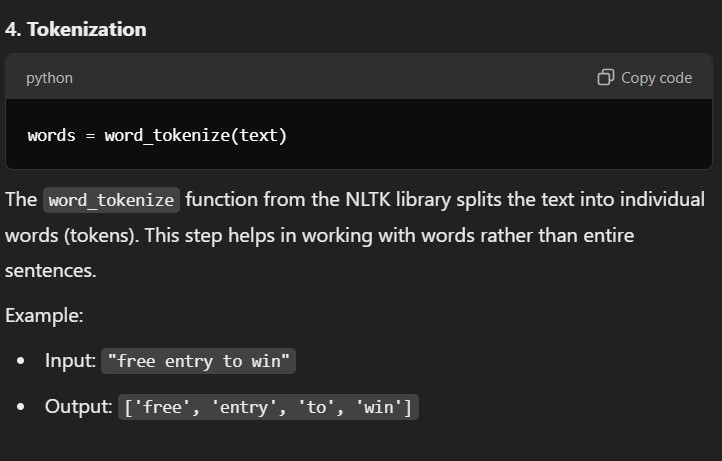 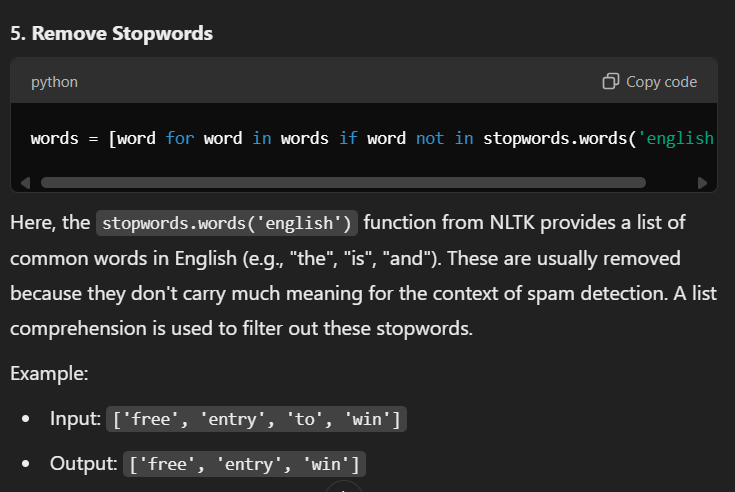 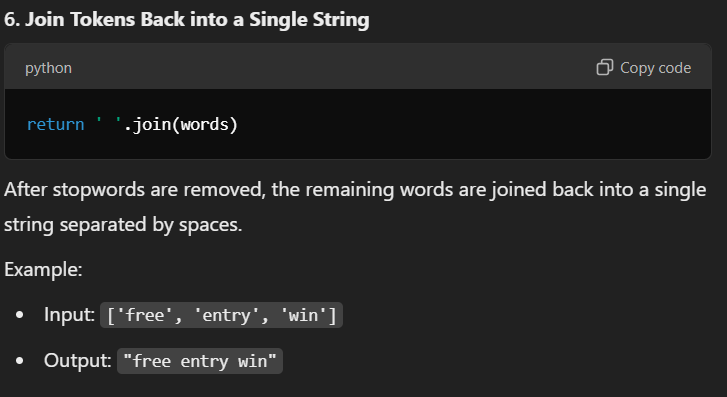

### 3) Encode Labels



In [ ]:
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

In [ ]:
data.head()

,label,message,cleaned_message,label_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,1
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,0


### 4) Data Split

In [ ]:
x = data['cleaned_message']
y = data['label_encoded']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### 5) Feature Vectorization
Convert text data into numerical format using TF-IDF Vectorization

In [ ]:
tfidf_vect = TfidfVectorizer(max_features=3000)

x_train_tfidf = tfidf_vect.fit_transform(x_train)
x_test_tfidf = tfidf_vect.transform(x_test)

### 6) Train the model

### i) Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

LR.fit(x_train_tfidf,y_train)
y_pred = LR.predict(x_test_tfidf)

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print('Model Performance: ')
print(f'acc : {acc}')
print(f'pre : {pre}')
print(f'rec : {rec}')
print(f'f1 : {f1}')

Model Performance: 
acc : 0.9650224215246637
pre : 0.9663865546218487
rec : 0.7666666666666667
f1 : 0.8550185873605948


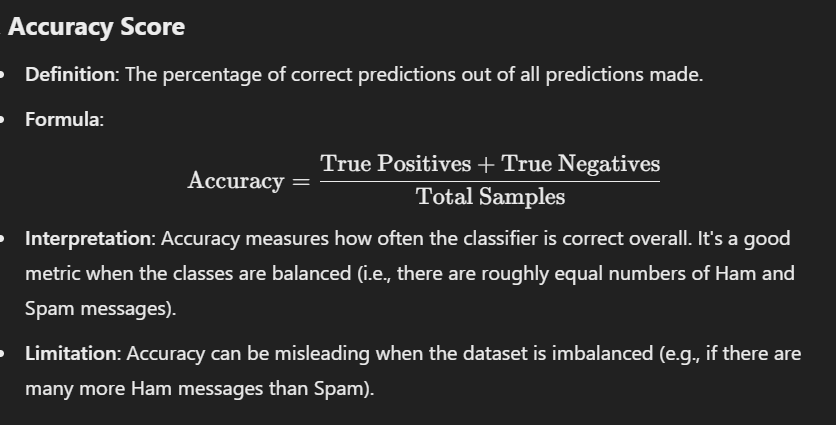 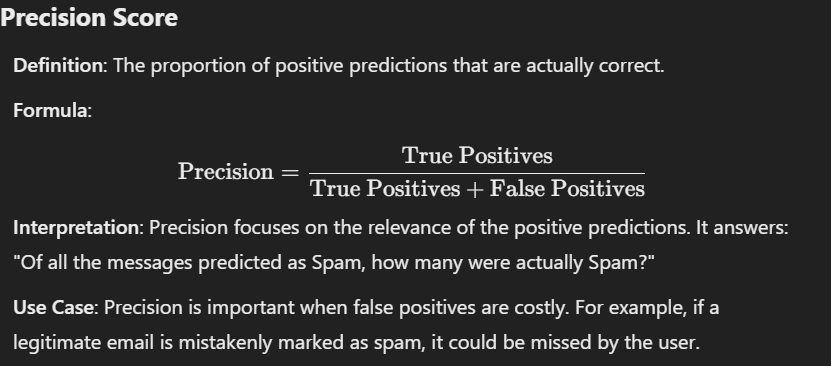 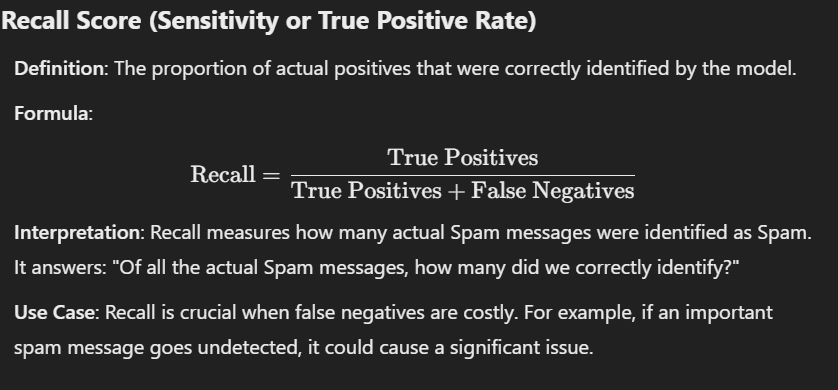 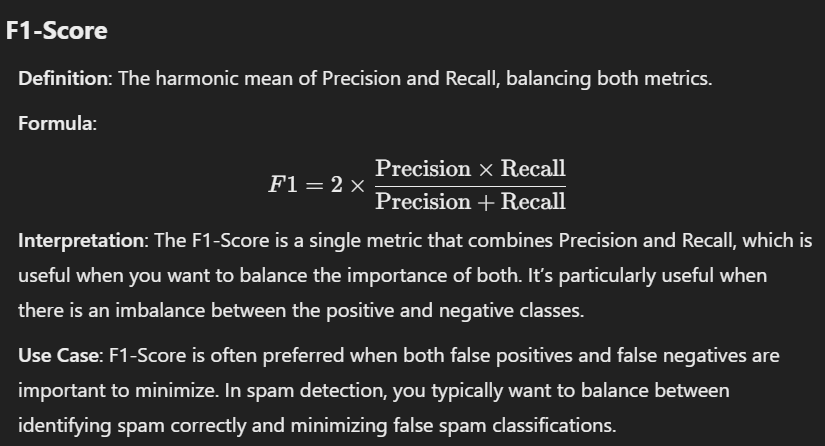

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       965
        Spam       0.97      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.97      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Confusion Matrix:
[[961   4]
 [ 35 115]]


In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Labels for the matrix
labels = ['Ham', 'Spam']

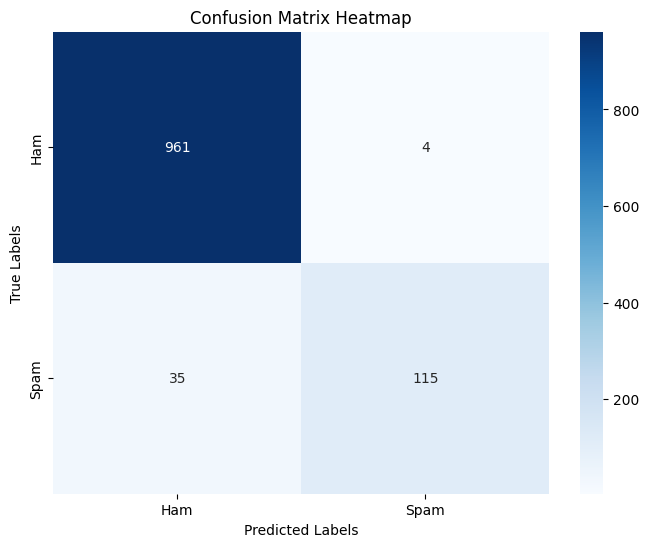

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add titles and labels
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()


### ii) Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(x_train_tfidf,y_train)
y_pred = nb.predict(x_test_tfidf)

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print('Model Performance: ')
print(f'acc : {acc}')
print(f'pre : {pre}')
print(f'rec : {rec}')
print(f'f1 : {f1}')

Model Performance: 
acc : 0.979372197309417
pre : 1.0
rec : 0.8466666666666667
f1 : 0.9169675090252708


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       965
        Spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
[[965   0]
 [ 23 127]]


In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Labels for the matrix
labels = ['Ham', 'Spam']

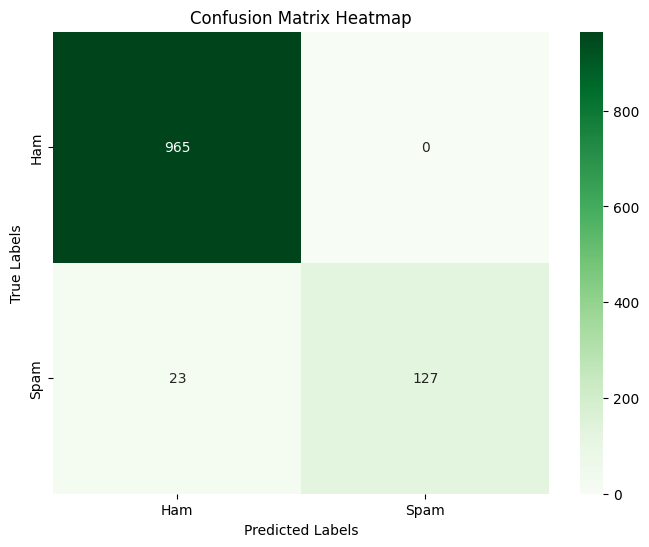

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)

# Add titles and labels
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()


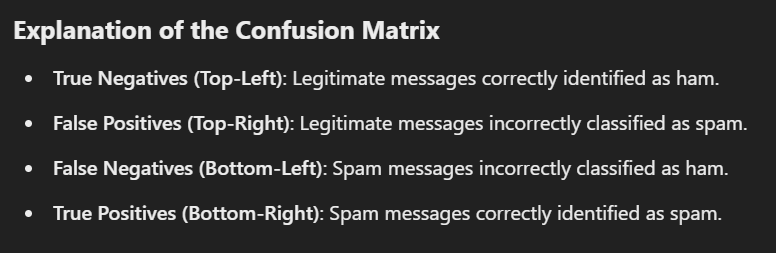